# Step 1: Data Preprocessing
We need to merge the customer and transaction data, create meaningful features like total spend, purchase frequency, and average transaction value, and then scale the features.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge the datasets to combine customer profile and transaction details
merged_data = transactions.merge(customers, on='CustomerID', how='left')

# Create new features for clustering
customer_data = merged_data.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    purchase_frequency=('TransactionID', 'nunique'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

# Scale the features to prepare for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['total_spend', 'purchase_frequency', 'avg_transaction_value']])

# Check the scaled data
scaled_data[:5]


array([[-0.06170143, -0.01145819, -0.07026341],
       [-0.87774353, -0.46749414, -0.93493297],
       [-0.40585722, -0.46749414, -0.02627131],
       [ 1.03254704,  1.35664965, -0.0767689 ],
       [-0.78392861, -0.92353008, -0.04002806]])

# Step 2: Apply Clustering (K-Means)
We’ll apply the K-Means algorithm to perform clustering. We can choose the number of clusters (e.g., 5 clusters). The Davies-Bouldin Index will be used to evaluate how well the clusters are separated and compact.

In [2]:
# Apply K-Means clustering with a chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Add cluster center coordinates for visualization
cluster_centers = kmeans.cluster_centers_

# Check the resulting cluster labels
customer_data[['CustomerID', 'Cluster']].head()


,CustomerID,Cluster
0,C0001,4
1,C0002,1
2,C0003,3
3,C0004,0
4,C0005,3


# Step 3: Evaluate the Model using DB Index
The Davies-Bouldin Index evaluates the clustering based on how compact the clusters are (lower DB index values indicate better clustering).

In [3]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 0.8524813520458038


# Step 4: Visualization of Clusters
To visualize the clusters, we can use PCA to reduce the feature space to 2 dimensions, and then plot the clusters.

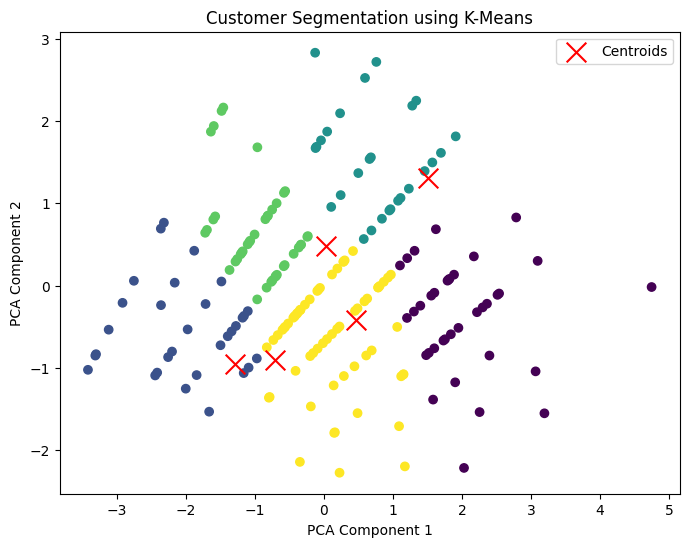

In [4]:
import matplotlib.pyplot as plt

# Perform PCA to reduce the data to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=customer_data['Cluster'], cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.title('Customer Segmentation using K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
